In [1]:
# Importing Python Neccesory Libraries
import numpy as np
import pandas as pd

# Importing scipy.stats library 
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import Data visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore')

# Import Stats Model Library
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Importing Data using pandas Function

URL = 'https://raw.githubusercontent.com/chandanc5525/SupplyChain_BusinessModel/main/Dataset/SCM.csv'
df = pd.read_csv(URL)
data = pd.read_csv(URL)
df.sample(10)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
18987,WH_118987,EID_68987,Urban,Mid,East,Zone 3,7,0,2,5499,...,0,155,25.0,NaN,25,0,A,2,27,31102
14871,WH_114871,EID_64871,Rural,Large,North,Zone 6,0,2,4,4652,...,1,103,38.0,NaN,18,0,A+,2,6,23142
17404,WH_117404,EID_67404,Rural,Large,West,Zone 6,8,5,4,4622,...,0,179,21.0,NaN,14,1,A,4,29,18084
4635,WH_104635,EID_54635,Rural,Mid,West,Zone 4,1,0,4,3692,...,1,173,39.0,NaN,13,0,B+,5,11,15135
1286,WH_101286,EID_51286,Rural,Mid,West,Zone 4,5,0,4,5486,...,1,209,28.0,2004.0,37,0,C,6,11,51140
21523,WH_121523,EID_71523,Rural,Mid,North,Zone 4,6,0,2,4850,...,1,98,34.0,2016.0,9,0,C,5,26,13148
181,WH_100181,EID_50181,Urban,Mid,South,Zone 4,4,3,2,6468,...,0,80,29.0,NaN,12,0,A,4,26,15087
13383,WH_113383,EID_63383,Rural,Large,South,Zone 5,4,4,4,4843,...,1,133,NaN,2002.0,25,1,B+,3,14,30118
6212,WH_106212,EID_56212,Rural,Mid,North,Zone 2,7,1,4,5000,...,0,196,15.0,1996.0,38,1,A+,3,12,51150
21951,WH_121951,EID_71951,Rural,Small,South,Zone 1,6,1,2,4386,...,0,200,31.0,NaN,15,1,B+,5,16,18132


In [3]:
# Checking Data Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [4]:
# Columns in the Dataset
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [5]:
# Checking Dataset Description
df.describe(include='all')

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,22150,22150,22150,22150,22150,22150,22150.000000,22150.000000,22150.000000,22150.000000,...,22150.000000,22150.000000,21273.000000,11605.000000,22150.000000,22150.000000,21345,22150.000000,22150.000000,22150.000000
unique,22150,22150,2,3,4,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,WH_100000,EID_50000,Rural,Large,North,Zone 6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN
freq,1,1,20334,8968,9069,7376,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4859,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.097020,0.777201,3.103928,4983.115711,...,0.656072,163.613725,28.936398,2009.401206,17.116659,0.304199,NaN,3.487765,18.767765,22086.780813
std,NaN,NaN,NaN,NaN,NaN,NaN,2.606289,1.201747,1.142886,1050.634225,...,0.475028,62.660709,7.843431,7.527223,9.174193,0.460078,NaN,1.691661,8.644778,11626.192340
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1821.000000,...,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,NaN,0.000000,1.000000,2065.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,2.000000,4309.250000,...,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,NaN,2.000000,11.000000,12151.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,3.000000,4859.000000,...,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,NaN,3.000000,20.000000,22099.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,4.000000,5499.000000,...,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,NaN,5.000000,26.000000,30102.000000


In [6]:
# Checking Categorical Information
cat_feature = df[['Location_type','WH_capacity_size','zone','WH_regional_zone',
                               'wh_owner_type','approved_wh_govt_certificate']]
for i in cat_feature:
  print('*'*20)
  print(i)
  print(cat_feature[i].value_counts())
  print('*'*20)

********************
Location_type
Rural    20334
Urban     1816
Name: Location_type, dtype: int64
********************
********************
WH_capacity_size
Large    8968
Mid      8902
Small    4280
Name: WH_capacity_size, dtype: int64
********************
********************
zone
North    9069
West     7055
South    5644
East      382
Name: zone, dtype: int64
********************
********************
WH_regional_zone
Zone 6    7376
Zone 5    4045
Zone 4    3708
Zone 2    2642
Zone 3    2552
Zone 1    1827
Name: WH_regional_zone, dtype: int64
********************
********************
wh_owner_type
Company Owned    12035
Rented           10115
Name: wh_owner_type, dtype: int64
********************
********************
approved_wh_govt_certificate
C     4859
B+    4321
B     4269
A     4158
A+    3738
Name: approved_wh_govt_certificate, dtype: int64
********************


In [7]:
df['Location_type'] = df['Location_type'].map({'Rural':1,'Urban':0})
df['wh_owner_type'] = df['wh_owner_type'].map({'Company Owned':1,'Rented':0}) 

In [8]:
# Using Label Enconder technique
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['WH_capacity_size']= label_encoder.fit_transform(df['WH_capacity_size'])
df['zone']= label_encoder.fit_transform(df['zone'])
df['WH_regional_zone']= label_encoder.fit_transform(df['WH_regional_zone'])
df['approved_wh_govt_certificate']= label_encoder.fit_transform(df['approved_wh_govt_certificate'])

In [9]:
# Checking random 10 sample 
df.sample(10)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
11687,WH_111687,EID_61687,1,1,3,3,7,0,2,7505,...,0,153,23.0,2003.0,24,1,1,3,11,31138
6253,WH_106253,EID_56253,1,0,1,5,5,0,3,3737,...,0,68,18.0,2001.0,32,0,4,5,29,44083
13545,WH_113545,EID_63545,1,0,2,4,4,0,3,5025,...,1,155,NaN,2015.0,14,0,3,1,25,16114
9003,WH_109003,EID_59003,1,0,2,4,3,1,2,4875,...,1,238,22.0,2002.0,33,0,2,6,10,40089
9379,WH_109379,EID_59379,0,1,1,3,1,0,2,5277,...,1,184,30.0,NaN,20,0,0,3,26,28139
10030,WH_110030,EID_60030,1,0,1,4,6,1,5,4661,...,1,65,NaN,2005.0,29,1,3,3,5,35104
13451,WH_113451,EID_63451,1,2,2,0,7,0,2,6073,...,1,163,32.0,2002.0,32,0,2,5,31,40078
7554,WH_107554,EID_57554,1,1,3,3,5,0,5,4381,...,1,198,24.0,2006.0,36,0,0,6,11,48138
7641,WH_107641,EID_57641,1,0,1,5,3,0,4,6416,...,1,168,28.0,2023.0,0,0,5,0,7,6073
5767,WH_105767,EID_55767,1,1,3,3,0,0,6,4145,...,1,229,30.0,NaN,24,0,0,4,26,30144


In [10]:
# Checling for Null Values in the Dataset
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       877
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate        0
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [11]:
# Missing Percentage in Feature Columns Information
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Ware_house_ID                    0.000000
WH_Manager_ID                    0.000000
Location_type                    0.000000
WH_capacity_size                 0.000000
zone                             0.000000
WH_regional_zone                 0.000000
num_refill_req_l3m               0.000000
transport_issue_l1y              0.000000
Competitor_in_mkt                0.000000
retail_shop_num                  0.000000
wh_owner_type                    0.000000
distributor_num                  0.000000
flood_impacted                   0.000000
flood_proof                      0.000000
electric_supply                  0.000000
dist_from_hub                    0.000000
workers_num                      3.959368
wh_est_year                     47.607223
storage_issue_reported_l3m       0.000000
temp_reg_mach                    0.000000
approved_wh_govt_certificate     0.000000
wh_breakdown_l3m                 0.000000
govt_check_l3m                   0.000000
product_wg_ton                   0

In [12]:
df['workers_num'] = df['workers_num'].fillna(28)

In [13]:
df = df.drop(['wh_est_year'],axis=1)

In [14]:
df= df.drop(['Ware_house_ID','WH_Manager_ID'],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 22150 non-null  int64  
 1   WH_capacity_size              22150 non-null  int32  
 2   zone                          22150 non-null  int32  
 3   WH_regional_zone              22150 non-null  int32  
 4   num_refill_req_l3m            22150 non-null  int64  
 5   transport_issue_l1y           22150 non-null  int64  
 6   Competitor_in_mkt             22150 non-null  int64  
 7   retail_shop_num               22150 non-null  int64  
 8   wh_owner_type                 22150 non-null  int64  
 9   distributor_num               22150 non-null  int64  
 10  flood_impacted                22150 non-null  int64  
 11  flood_proof                   22150 non-null  int64  
 12  electric_supply               22150 non-null  int64  
 13  d

In [16]:
features = df.columns
features = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton']

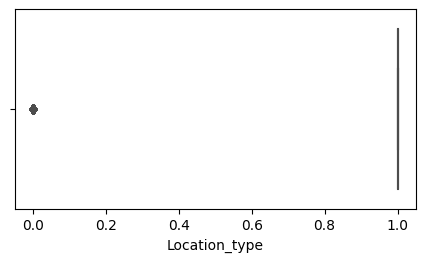

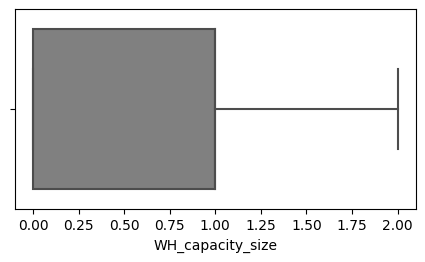

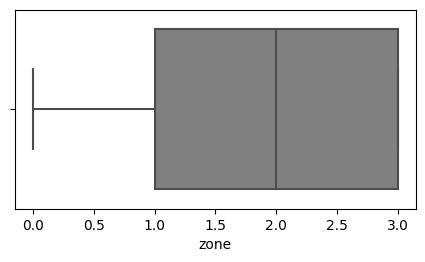

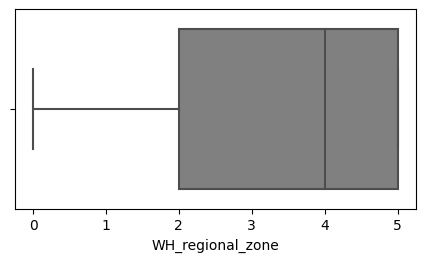

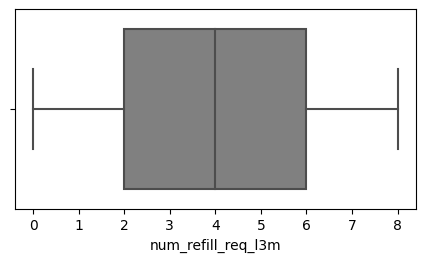

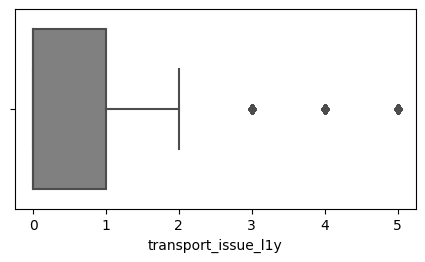

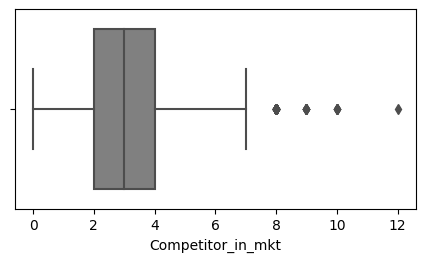

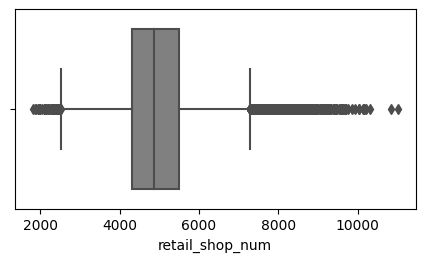

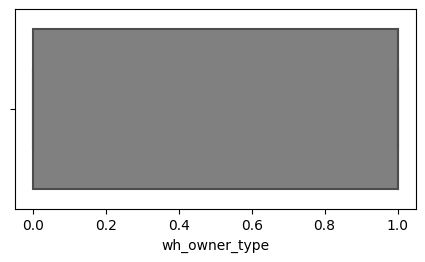

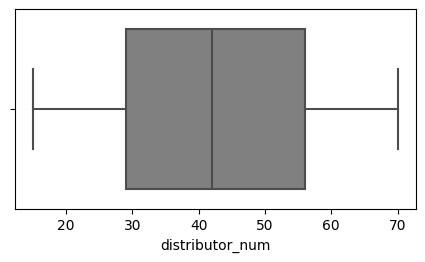

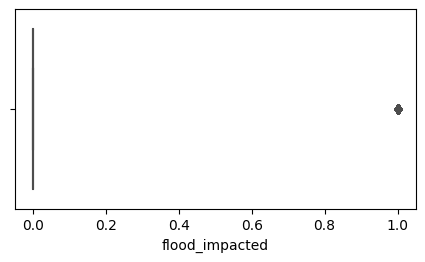

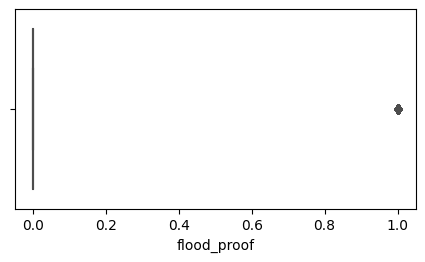

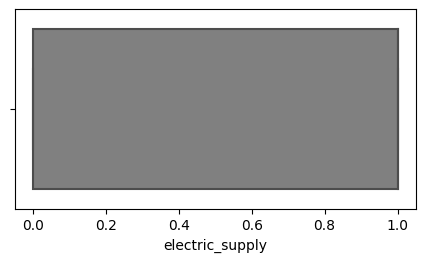

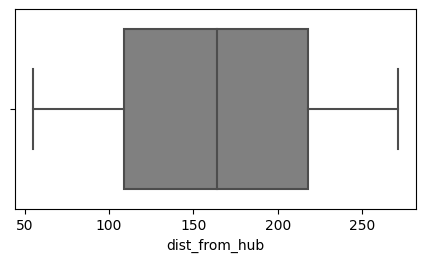

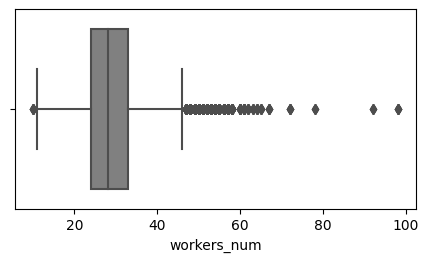

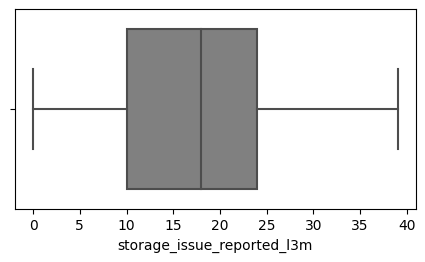

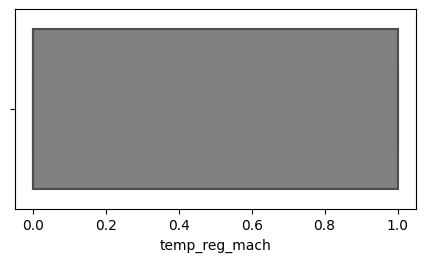

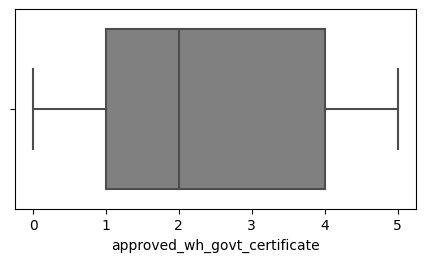

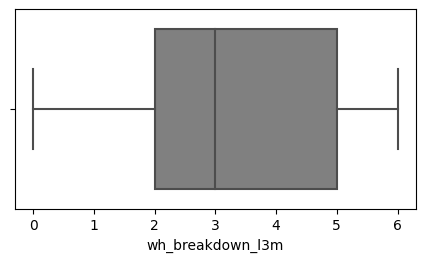

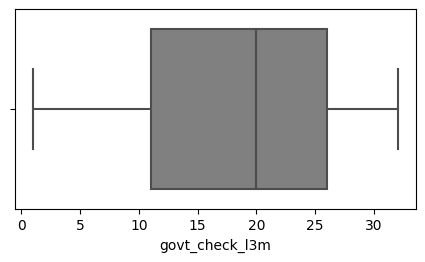

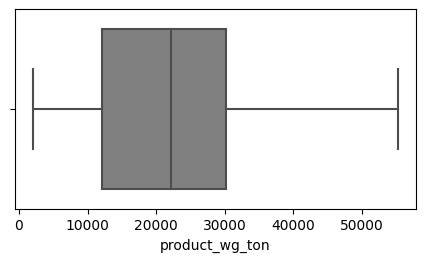

In [17]:
# Checking Outlier In The Datset
for col in enumerate(features):
    plt.figure(figsize=(30,15))
    plt.subplot(5,5,col[0]+1)
    sns.boxplot(x = col[1],color='gray',data=df)
    plt.show()

In [18]:
X = df.drop('product_wg_ton',axis=1).values
y = df['product_wg_ton'].values

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [21]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [65]:
model = Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))


model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [66]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),
          batch_size=200,epochs =500)

Epoch 1/500
78/78 [==============================] - 1s 3ms/step - loss: 626306240.0000 - val_loss: 614867520.0000
Epoch 2/500
78/78 [==============================] - 0s 2ms/step - loss: 625708864.0000 - val_loss: 613660672.0000
Epoch 3/500
78/78 [==============================] - 0s 2ms/step - loss: 623359296.0000 - val_loss: 609993728.0000
Epoch 4/500
78/78 [==============================] - 0s 2ms/step - loss: 617854592.0000 - val_loss: 602673024.0000
Epoch 5/500
78/78 [==============================] - 0s 2ms/step - loss: 608131392.0000 - val_loss: 590793600.0000
Epoch 6/500
78/78 [==============================] - 0s 2ms/step - loss: 593316224.0000 - val_loss: 573596800.0000
Epoch 7/500
78/78 [==============================] - 0s 2ms/step - loss: 572871360.0000 - val_loss: 550706944.0000
Epoch 8/500
78/78 [==============================] - 0s 2ms/step - loss: 546353792.0000 - val_loss: 521520192.0000
Epoch 9/500
78/78 [==============================] - 0s 2ms/step - loss: 5130860

Epoch 72/500
78/78 [==============================] - 0s 2ms/step - loss: 82547112.0000 - val_loss: 82314696.0000
Epoch 73/500
78/78 [==============================] - 0s 2ms/step - loss: 80774432.0000 - val_loss: 80483136.0000
Epoch 74/500
78/78 [==============================] - 0s 2ms/step - loss: 78959128.0000 - val_loss: 78608616.0000
Epoch 75/500
78/78 [==============================] - 0s 2ms/step - loss: 77103976.0000 - val_loss: 76692240.0000
Epoch 76/500
78/78 [==============================] - 0s 2ms/step - loss: 75210744.0000 - val_loss: 74768160.0000
Epoch 77/500
78/78 [==============================] - 0s 2ms/step - loss: 73283592.0000 - val_loss: 72789688.0000
Epoch 78/500
78/78 [==============================] - 0s 2ms/step - loss: 71338704.0000 - val_loss: 70819168.0000
Epoch 79/500
78/78 [==============================] - 0s 2ms/step - loss: 69374488.0000 - val_loss: 68796272.0000
Epoch 80/500
78/78 [==============================] - 0s 2ms/step - loss: 67404552.0000 

Epoch 144/500
78/78 [==============================] - 0s 2ms/step - loss: 2443877.5000 - val_loss: 2459274.2500
Epoch 145/500
78/78 [==============================] - 0s 2ms/step - loss: 2400653.7500 - val_loss: 2430247.5000
Epoch 146/500
78/78 [==============================] - 0s 2ms/step - loss: 2364479.7500 - val_loss: 2387726.0000
Epoch 147/500
78/78 [==============================] - 0s 2ms/step - loss: 2332364.7500 - val_loss: 2384431.7500
Epoch 148/500
78/78 [==============================] - 0s 2ms/step - loss: 2305207.2500 - val_loss: 2352940.5000
Epoch 149/500
78/78 [==============================] - 0s 2ms/step - loss: 2283787.2500 - val_loss: 2318236.2500
Epoch 150/500
78/78 [==============================] - 0s 2ms/step - loss: 2264353.5000 - val_loss: 2303846.2500
Epoch 151/500
78/78 [==============================] - 0s 2ms/step - loss: 2246923.2500 - val_loss: 2280801.0000
Epoch 152/500
78/78 [==============================] - 0s 2ms/step - loss: 2233049.0000 - val_lo

78/78 [==============================] - 0s 2ms/step - loss: 1969660.2500 - val_loss: 2016563.7500
Epoch 217/500
78/78 [==============================] - 0s 2ms/step - loss: 1968707.8750 - val_loss: 2022676.1250
Epoch 218/500
78/78 [==============================] - 0s 2ms/step - loss: 1967249.2500 - val_loss: 2009344.8750
Epoch 219/500
78/78 [==============================] - 0s 2ms/step - loss: 1963417.6250 - val_loss: 2006307.5000
Epoch 220/500
78/78 [==============================] - 0s 2ms/step - loss: 1964561.2500 - val_loss: 2007856.7500
Epoch 221/500
78/78 [==============================] - 0s 2ms/step - loss: 1960626.7500 - val_loss: 2003238.7500
Epoch 222/500
78/78 [==============================] - 0s 2ms/step - loss: 1960239.8750 - val_loss: 2015476.7500
Epoch 223/500
78/78 [==============================] - 0s 2ms/step - loss: 1958544.3750 - val_loss: 2003272.8750
Epoch 224/500
78/78 [==============================] - 0s 2ms/step - loss: 1955824.0000 - val_loss: 1997861.87

78/78 [==============================] - 0s 2ms/step - loss: 1892832.1250 - val_loss: 1924611.8750
Epoch 289/500
78/78 [==============================] - 0s 2ms/step - loss: 1888085.7500 - val_loss: 1931731.7500
Epoch 290/500
78/78 [==============================] - 0s 2ms/step - loss: 1889825.0000 - val_loss: 1927439.3750
Epoch 291/500
78/78 [==============================] - 0s 2ms/step - loss: 1888020.0000 - val_loss: 1923036.7500
Epoch 292/500
78/78 [==============================] - 0s 2ms/step - loss: 1886601.1250 - val_loss: 1920832.5000
Epoch 293/500
78/78 [==============================] - 0s 2ms/step - loss: 1885220.8750 - val_loss: 1924111.1250
Epoch 294/500
78/78 [==============================] - 0s 2ms/step - loss: 1883298.8750 - val_loss: 1920249.5000
Epoch 295/500
78/78 [==============================] - 0s 2ms/step - loss: 1889117.7500 - val_loss: 1919788.6250
Epoch 296/500
78/78 [==============================] - 0s 2ms/step - loss: 1882649.3750 - val_loss: 1918613.25

78/78 [==============================] - 0s 2ms/step - loss: 1832783.8750 - val_loss: 1867502.6250
Epoch 361/500
78/78 [==============================] - 0s 2ms/step - loss: 1831016.1250 - val_loss: 1860834.8750
Epoch 362/500
78/78 [==============================] - 0s 2ms/step - loss: 1830881.5000 - val_loss: 1859632.8750
Epoch 363/500
78/78 [==============================] - 0s 2ms/step - loss: 1830275.1250 - val_loss: 1859168.8750
Epoch 364/500
78/78 [==============================] - 0s 2ms/step - loss: 1829691.2500 - val_loss: 1857029.7500
Epoch 365/500
78/78 [==============================] - 0s 2ms/step - loss: 1828580.1250 - val_loss: 1855483.1250
Epoch 366/500
78/78 [==============================] - 0s 2ms/step - loss: 1826017.3750 - val_loss: 1855069.0000
Epoch 367/500
78/78 [==============================] - 0s 2ms/step - loss: 1823453.6250 - val_loss: 1853092.2500
Epoch 368/500
78/78 [==============================] - 0s 2ms/step - loss: 1825438.1250 - val_loss: 1863306.62

78/78 [==============================] - 0s 2ms/step - loss: 1552672.0000 - val_loss: 1582272.8750
Epoch 433/500
78/78 [==============================] - 0s 2ms/step - loss: 1548788.7500 - val_loss: 1582710.2500
Epoch 434/500
78/78 [==============================] - 0s 2ms/step - loss: 1542289.5000 - val_loss: 1580255.7500
Epoch 435/500
78/78 [==============================] - 0s 2ms/step - loss: 1537293.2500 - val_loss: 1567426.3750
Epoch 436/500
78/78 [==============================] - 0s 2ms/step - loss: 1533591.5000 - val_loss: 1560728.0000
Epoch 437/500
78/78 [==============================] - 0s 2ms/step - loss: 1528544.1250 - val_loss: 1556293.8750
Epoch 438/500
78/78 [==============================] - 0s 2ms/step - loss: 1525722.2500 - val_loss: 1559405.7500
Epoch 439/500
78/78 [==============================] - 0s 2ms/step - loss: 1520599.7500 - val_loss: 1548014.7500
Epoch 440/500
78/78 [==============================] - 0s 2ms/step - loss: 1514849.1250 - val_loss: 1542959.37

<AxesSubplot: >

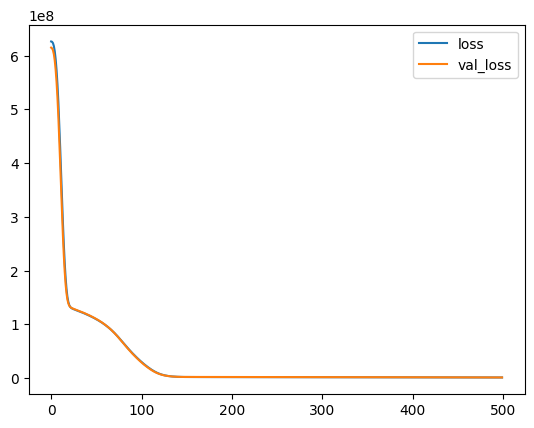

In [67]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [69]:
predictions = model.predict(X_test)

208/208 [==============================] - 0s 752us/step


In [70]:
predictions

array([[21682.373],
       [36407.55 ],
       [ 7429.835],
       ...,
       [26795.236],
       [29369.201],
       [47843.53 ]], dtype=float32)

In [71]:
np.sqrt(mean_squared_error(y_test,predictions))

1188.9093622328064

In [72]:
mean_absolute_error(y_test,predictions)

899.9387786796345

In [73]:
explained_variance_score(y_test,predictions)

0.9895594146849255

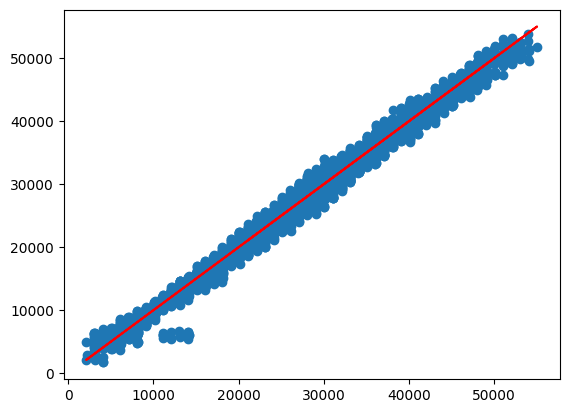

In [74]:
plt.scatter(x = y_test,y = predictions)
plt.plot(y_test,y_test,'r')
plt.show()

In [75]:
r2_score(y_test,predictions)

0.9895450680023335

In [76]:
from sklearn.feature_selection import VarianceThreshold
varModel=VarianceThreshold(threshold=0)
varModel.fit(X_train)
constArr=varModel.get_support()
constArr
import collections
collections.Counter(constArr)

Counter({True: 20})